In [2]:
import pandas as pd
import numpy as np
import os
import math as m
import matplotlib.pylab as pl
from PIL import Image
import subprocess 
import matplotlib.pyplot as plt

Parâmetros

In [13]:
model = 'model_2018-11-15_5-22'
simul_log = 'simulation_log_2018-11-15_14-24_res1_Caso01_[11631.89, 5447.37, -162.75, 3.95, -0.51, 0.11]'
save_fig_path = 'C:/Users/AlphaCrucis_Control1/Desktop/monografia_alex_lucas/rede4/teste2/'

num_case = int(simul_log.split('_')[5][-2:]) # Valor da pasta compilado

case_folder_relation = {
    1: 'Suape_2017/RT/Caso1/smh_v00004.txt',
    2: 'Suape_2017/RT/Caso2/smh_v00004.txt',
    3: 'Suape_2017/RT/Caso3/smh_v00004.txt',
    4: 'Suape_2017/RT/Caso4/smh_v00004.txt',
    5: 'Suape_2017/RT/Caso5/smh_v00004.txt',
    6: 'Suape_2017/RT/Caso6/smh_v00077.txt',
    7: 'Suape_2017/RT/Caso9/smh_v00004.txt',
    8: 'Suape_2017/RT/Caso10/smh_v00004.txt',
    9: 'Suape_2017/RT/Caso12/smh_v00004.txt',
    10: 'Suape_2017/RT/Caso13/smh_v00004.txt',
    11: 'Suape_2017/RT/Caso14/smh_v00004.txt',
    12: 'Suape_2017/RT/Caso17/smh_v00004.txt',
    13: 'Suape_2017/RT/Caso18/smh_v00004.txt',
    14: 'Suape_2017/RT/Caso22/smh_v00004.txt',
    15: 'Suape_2017/RT/Caso23/smh_v00004.txt',
    16: 'Suape_2017/RT/Caso26/smh_v00036.txt',
    17: 'Suape_2017/RT/Caso28/smh_v00030.txt',
    18: 'Suape_Aframax/RT/Caso1/smh_v00036.txt',
    19: 'Suape_Aframax/RT/Caso2/smh_v00036.txt',
    20: 'Suape_Aframax/RT/Caso3/smh_v00036.txt',
    21: 'Suape_Aframax/RT/Caso4/smh_v00036.txt',
    22: 'Suape_Aframax/RT/Caso5/smh_v00036.txt',
    23: 'Suape_Aframax/RT/Caso6/smh_v00036.txt',
    24: 'Suape_Aframax/RT/Caso7/smh_v00036.txt',
    25: 'Suape_Aframax/RT/Caso8/smh_v00036.txt',
    26: 'Suape_Aframax/RT/Caso9/smh_v00036.txt',
    27: 'Suape_Aframax/RT/Caso10/smh_v00037.txt',
    28: 'Suape_Aframax/RT/Caso11/smh_v00037.txt',
    29: 'Suape_Aframax/RT/Caso12/smh_v00036.txt',
    30: 'Suape_Aframax/RT/Caso13/smh_v00036.txt',
    31: 'Suape_Aframax/RT/Caso14/smh_v00036.txt',
    32: 'Suape_Aframax/RT/Caso15/smh_v00036.txt',
    33: 'Suape_Aframax/RT/Caso16/smh_v00036.txt',
    34: 'Suape_PDZ/FT/Outputs_FT/Caso1/smh_v00004_20170814_102039.txt',
    35: 'Suape_PDZ/FT/Outputs_FT/Caso2/smh_v00004_20170814_103220.txt',
    36: 'Suape_PDZ/FT/Outputs_FT/Caso3/smh_v00004_20170814_114251.txt',
    37: 'Suape_PDZ/FT/Outputs_FT/Caso4/smh_v00004_20170816_175923.txt',
    38: 'Suape_PDZ/RT/Caso1/smh_v00037_20171009_093846.txt',
    39: 'Suape_PDZ/RT/Caso2/smh_v00037_20171009_101104.txt',
    40: 'Suape_PDZ/RT/Caso3/smh_v00037_20171009_104723.txt',
    41: 'Suape_PDZ/RT/Caso4/smh_v00037_20171009_112202.txt',
    42: 'Suape_PDZ/RT/Caso5/smh_v00028_20171009_135920.txt',
    43: 'Suape_PDZ/RT/Caso9/smh_v00053_20171010_081234.txt',
    44: 'Suape_PDZ/RT2/Caso1/smh_v00037_20171218_093301.txt',
    45: 'Suape_PDZ/RT2/Caso2/smh_v00037_20171218_104020.txt',
}

print(case_folder_relation[num_case])

orig_path = '../Output/' + case_folder_relation[num_case]
simul_path = '../../RL_vessel/keras_logs/' + model + '/' + simul_log + '.txt'

Suape_2017/RT/Caso1/smh_v00004.txt


Importar dados originais

In [14]:
df_orig = pd.read_csv(orig_path, sep=" ", skiprows=11)
df_orig.head()

,time_stamp,zz,vx,vy,vzz,rudder_demanded,propeller_demanded,distance_midline,distance_target,cog,sog,local_cog
0,301.0,-160.81,4.19,-0.18,-0.05,0.0,2,-32.879,6024.934,-163.27,4.194,-3.108
1,301.1,-160.82,4.19,-0.18,-0.05,0.0,2,-32.911,6024.514,-163.28,4.194,-3.098
2,301.2,-160.82,4.19,-0.18,-0.05,0.0,2,-32.934,6024.097,-163.28,4.194,-3.098
3,301.3,-160.83,4.19,-0.18,-0.05,0.0,2,-32.954,6023.670,-163.29,4.194,-3.088
4,301.4,-160.83,4.19,-0.18,-0.05,0.0,2,-32.976,6023.253,-163.29,4.194,-3.088


Importar dados da simulação

In [15]:
df_simul = pd.read_csv(simul_path, sep=" ")
df_simul.head()

,time,x,y,zz,vx,vy,vzz,rudder_demanded,propeller_demanded,distance_midline,distance_target
0,0.5,11631.497707,5447.301514,-162.738931,3.949645,-0.509910,-0.110192,0.022218,0.0,-5.909782,6031.536391
1,0.6,11631.105418,5447.233013,-162.727902,3.949289,-0.509824,-0.110384,0.030666,1.0,-5.883961,6031.139404
2,0.7,11630.713180,5447.164440,-162.716854,3.948933,-0.509742,-0.110576,0.035210,1.0,-5.858224,6030.742447
3,0.8,11630.320991,5447.095793,-162.705787,3.948576,-0.509661,-0.110764,0.039567,1.0,-5.832569,6030.345521
4,0.9,11629.928851,5447.027074,-162.694701,3.948218,-0.509580,-0.110947,0.044880,2.0,-5.806996,6029.948624


# Plotagem comparativa

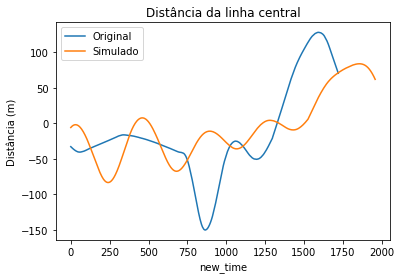

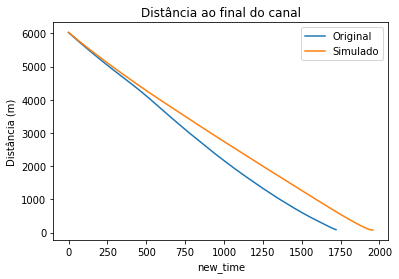

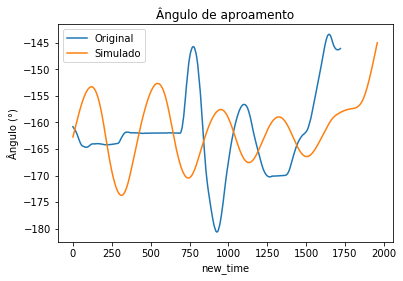

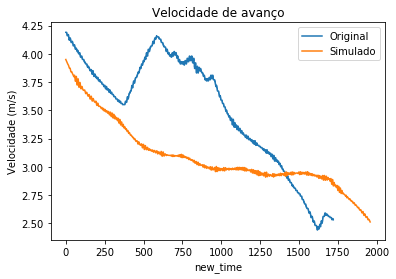

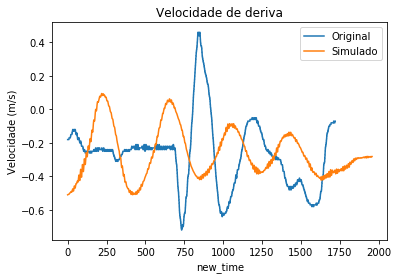

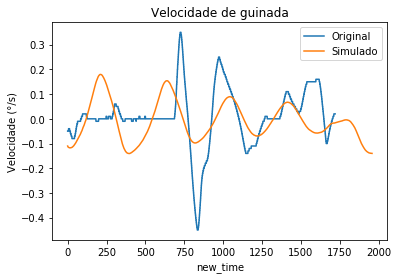

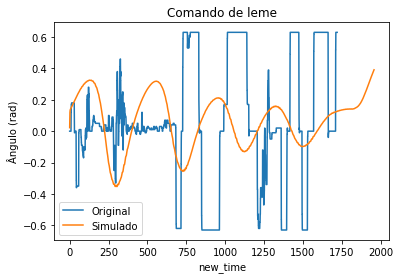

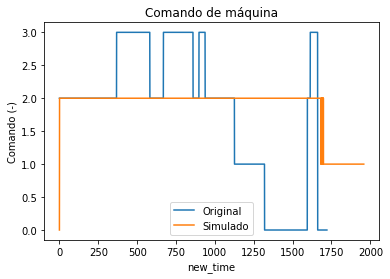

In [16]:
def plot_fig(df_orig, df_simul, plot_column, plot_title, y_label):
    df_orig['new_time'] = np.divide(list(range(0, df_orig.shape[0])),10)
    df_simul['new_time'] = np.divide(list(range(0, df_simul.shape[0])),10)
    fig = df_orig.loc[0:df_simul.shape[0]].plot(x='new_time', y=plot_column, label='Original', title=plot_title)
    fig.set_ylabel(y_label)
    fig.set_xlabel('Tempo (s)')
    df_simul.plot(x='new_time', y=plot_column, ax=fig, label='Simulado')
    fig.get_figure().savefig(save_fig_path + plot_column)


plot_fig(df_orig, df_simul, 'distance_midline', 'Distância da linha central', 'Distância (m)')
plot_fig(df_orig, df_simul, 'distance_target', 'Distância ao final do canal', 'Distância (m)')
plot_fig(df_orig, df_simul, 'zz', 'Ângulo de aproamento', 'Ângulo (°)')
plot_fig(df_orig, df_simul, 'vx', 'Velocidade de avanço', 'Velocidade (m/s)')
plot_fig(df_orig, df_simul, 'vy', 'Velocidade de deriva', 'Velocidade (m/s)')
plot_fig(df_orig, df_simul, 'vzz', 'Velocidade de guinada', 'Velocidade (°/s)')
plot_fig(df_orig, df_simul, 'rudder_demanded', 'Comando de leme', 'Ângulo (rad)')
plot_fig(df_orig, df_simul, 'propeller_demanded', 'Comando de máquina', 'Comando (-)')

# Plotagem apenas do caso original para fazer o relatório

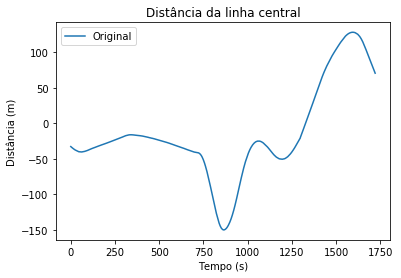

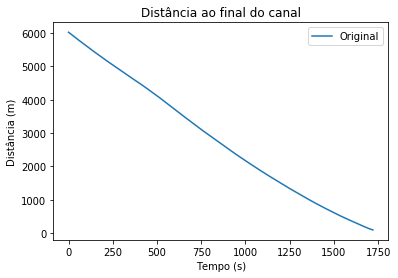

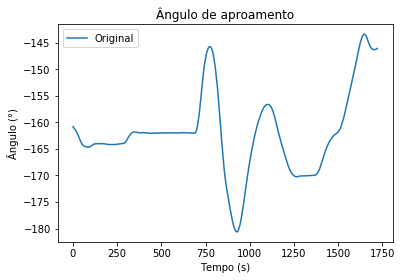

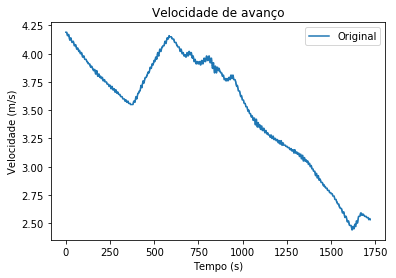

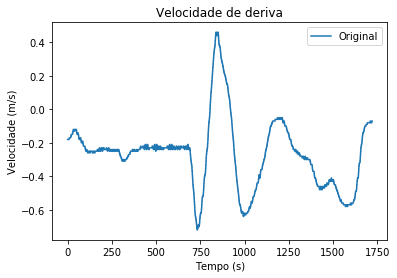

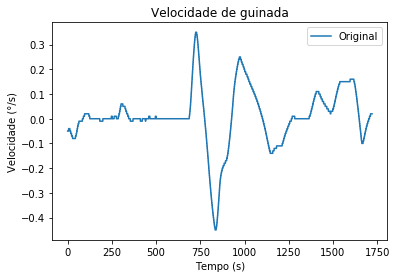

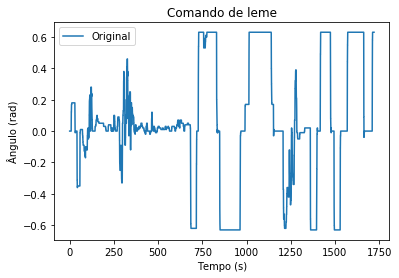

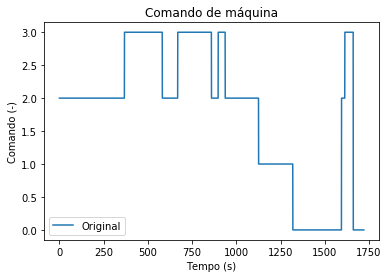

In [27]:
num_case = 1

def plot_case(df_orig, plot_column, plot_title, y_label):
    df_orig['new_time'] = np.divide(list(range(0, df_orig.shape[0])),10)
    fig = df_orig.plot(x='new_time', y=plot_column, label='Original', title=plot_title, color='C0')
    fig.set_ylabel(y_label)
    fig.set_xlabel('Tempo (s)')
    fig.get_figure().savefig('C:/Users/AlphaCrucis_Control1/Desktop/monografia_alex_lucas/Caso02-Alex/' + plot_column)

orig_path = '../Output/' + case_folder_relation[num_case]
df_orig = pd.read_csv(orig_path, sep=" ", skiprows=11)
df_orig.head()
plot_case(df_orig, 'distance_midline', 'Distância da linha central', 'Distância (m)')
plot_case(df_orig, 'distance_target', 'Distância ao final do canal', 'Distância (m)')
plot_case(df_orig, 'zz', 'Ângulo de aproamento', 'Ângulo (°)')
plot_case(df_orig, 'vx', 'Velocidade de avanço', 'Velocidade (m/s)')
plot_case(df_orig, 'vy', 'Velocidade de deriva', 'Velocidade (m/s)')
plot_case(df_orig, 'vzz', 'Velocidade de guinada', 'Velocidade (°/s)')
plot_case(df_orig, 'rudder_demanded', 'Comando de leme', 'Ângulo (rad)')
plot_case(df_orig, 'propeller_demanded', 'Comando de máquina', 'Comando (-)')

# Plotagem apenas do caso simulado para fazer o relatório

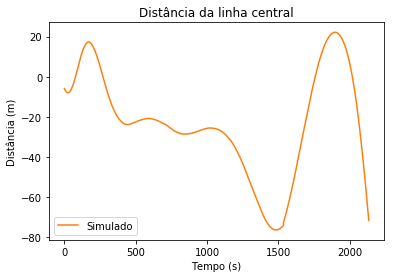

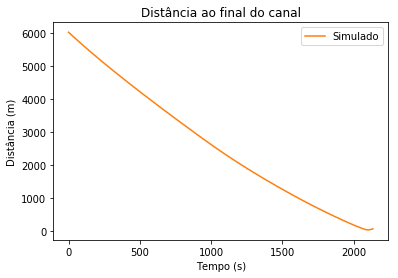

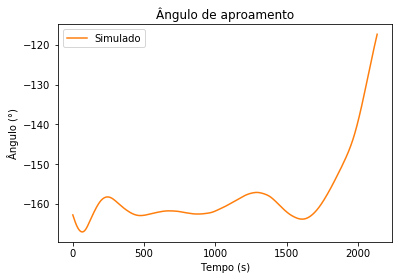

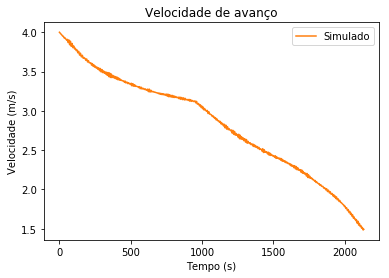

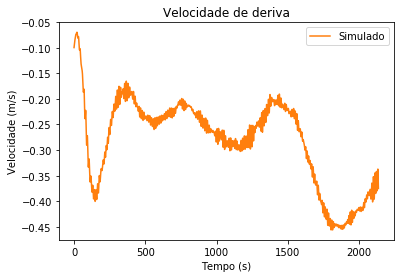

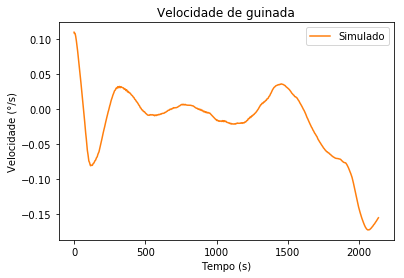

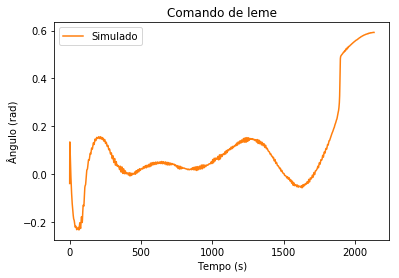

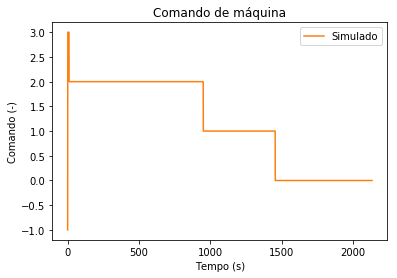

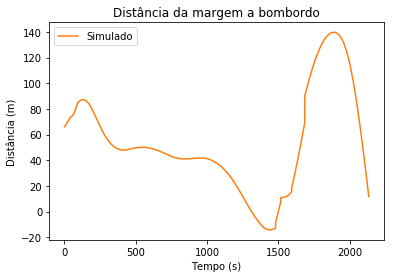

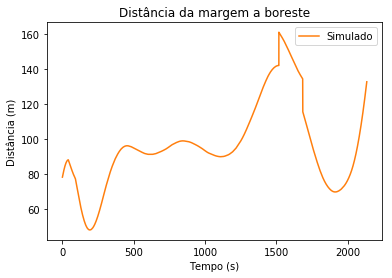

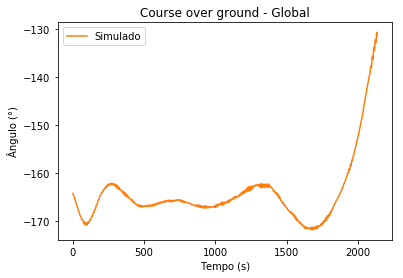

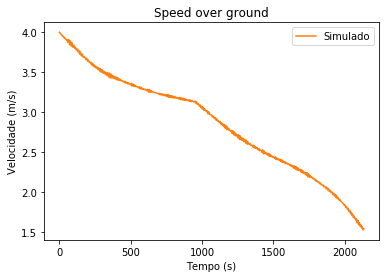

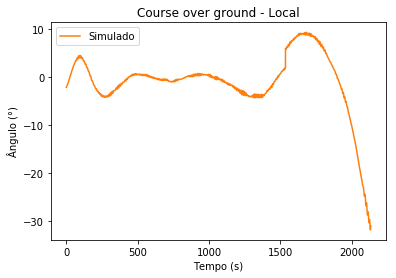

In [11]:
model = 'model_2018-10-17_14-14'
output_text = 'simulation_log_2018-11-15_17-12_res1_Caso01_[11631.89, 5447.37, -107.25, 4.0, -0.1, -0.11]'

def plot_case(df_simul, plot_column, plot_title, y_label):
    df_simul['new_time'] = np.divide(list(range(0, df_simul.shape[0])),10)
    fig = df_simul.plot(x='new_time', y=plot_column, label='Simulado', title=plot_title, color='C1')
    fig.set_ylabel(y_label)
    fig.set_xlabel('Tempo (s)')
    #fig.get_figure().savefig('C:/Users/AlphaCrucis_Control1/Desktop/monografia_alex_lucas/Caso02-Alex/' + plot_column)

simul_path = 'C:\\Users\\AlphaCrucis_Control1\\PycharmProjects\\RL_vessel\\keras_logs\\' + model + '\\' + output_text + '.txt'
df_simul = pd.read_csv(simul_path, sep=" ")
df_simul.head()
plot_case(df_simul, 'distance_midline', 'Distância da linha central', 'Distância (m)')
plot_case(df_simul, 'distance_target', 'Distância ao final do canal', 'Distância (m)')
plot_case(df_simul, 'zz', 'Ângulo de aproamento', 'Ângulo (°)')
plot_case(df_simul, 'vx', 'Velocidade de avanço', 'Velocidade (m/s)')
plot_case(df_simul, 'vy', 'Velocidade de deriva', 'Velocidade (m/s)')
plot_case(df_simul, 'vzz', 'Velocidade de guinada', 'Velocidade (°/s)')
plot_case(df_simul, 'rudder_demanded', 'Comando de leme', 'Ângulo (rad)')
plot_case(df_simul, 'propeller_demanded', 'Comando de máquina', 'Comando (-)')
plot_case(df_simul, 'distance_port', 'Distância da margem a bombordo', 'Distância (m)')
plot_case(df_simul, 'distance_starboard', 'Distância da margem a boreste', 'Distância (m)')
plot_case(df_simul, 'cog', 'Course over ground - Global', 'Ângulo (°)')
plot_case(df_simul, 'sog', 'Speed over ground', 'Velocidade (m/s)')
plot_case(df_simul, 'local_cog', 'Course over ground - Local', 'Ângulo (°)')

# Gerar o folder inteiro

In [3]:
class Point:
    def __init__(self, x, y, zz=None):
        self.x = x
        self.y = y
        self.zz = zz

In [4]:
def calc_dist_lateral(row):#center, angle):
    buoys = [Point(11724.8015, 5582.9127), Point(11770.3259, 5378.4429), Point(9191.6506, 4967.8532), Point(9235.8653, 4772.7884),
              Point(6897.7712, 4417.3295), Point(6955.9288, 4227.1846), Point(5539.2417, 4089.4744), Point(5812.6136, 3768.5637)]
    center = Point(row['x'], row['y'])
    section = determine_section(center, buoys)
    dsb = dist_line_point(buoys[section], buoys[section + 2], center, -1)  # distancia estibordo
    dpb = dist_line_point(buoys[section + 1], buoys[section + 3], center, 1)  # distancia bombordo
    
    return pd.Series([dpb, dsb])

def determine_section(point, buoys):
    for i in range(0, len(buoys), 2):
        # Verifica se passou de cada limite de boia
        if point.x < (buoys[len(buoys) - i - 1].x + buoys[len(buoys) - i - 2].x) / 2:
            if len(buoys) - i - 2 == len(buoys) - 2:
                return len(buoys) - i - 4  # Desconsidera se passa do target
            else:
                return len(buoys) - i - 2
    return len(buoys) - i - 2

def dist_line_point(line_p_1, line_p_2, point, flag_type):
    # Define a linha por dois pontos
    y_diff = line_p_2.y - line_p_1.y
    x_diff = line_p_2.x - line_p_1.x
    y_line = y_diff / x_diff * (point.x - line_p_1.x) + line_p_1.y

    # Fator para verificar se passou do canal (linha)
    factor = 1
    if (y_line > point.y and flag_type == 1) or (y_line < point.y and flag_type == -1):
        factor = -1

    return factor * abs(y_diff * point.x - x_diff * point.y + line_p_2.x * line_p_1.y - line_p_2.y * line_p_1.x) / m.sqrt(y_diff ** 2 + x_diff ** 2)

SC1


C:\Users\AlphaCrucis_Control1\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


SC2
SC3
SC4


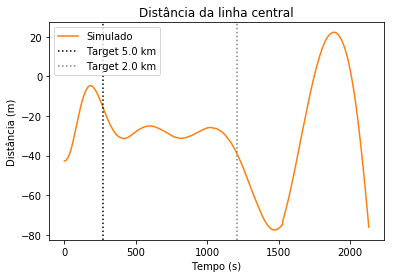

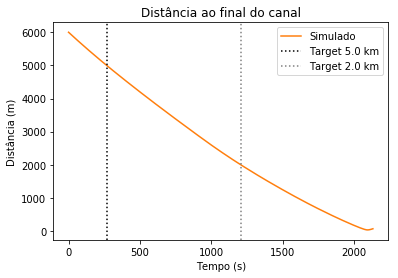

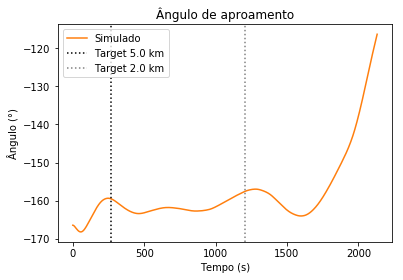

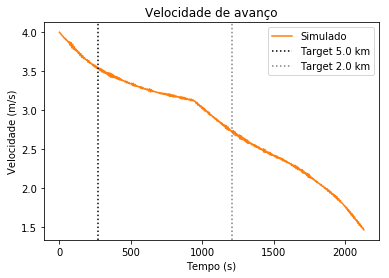

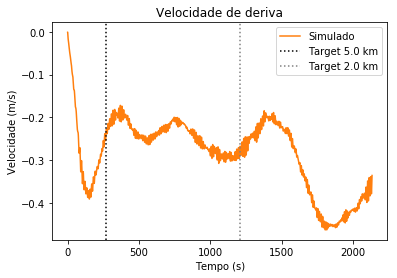

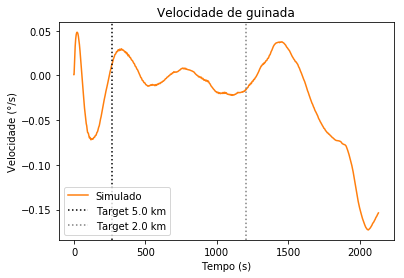

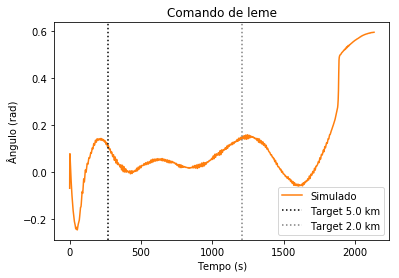

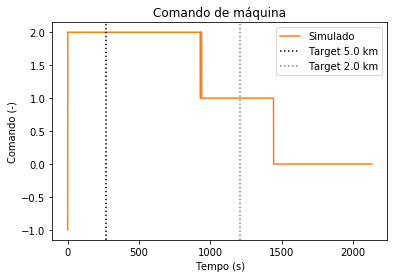

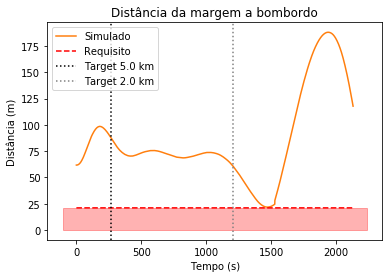

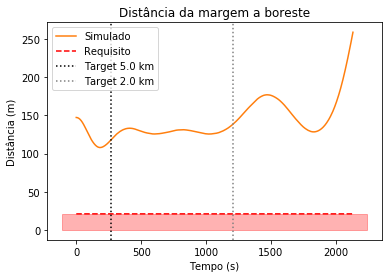

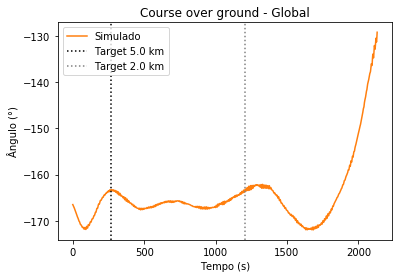

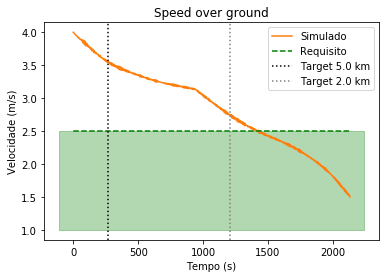

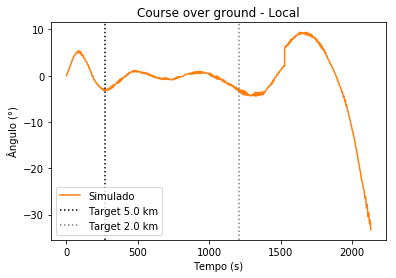

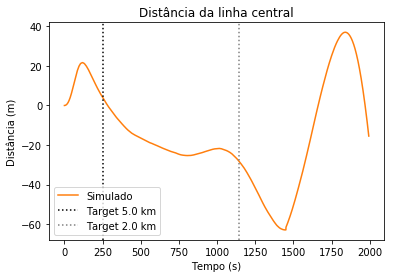

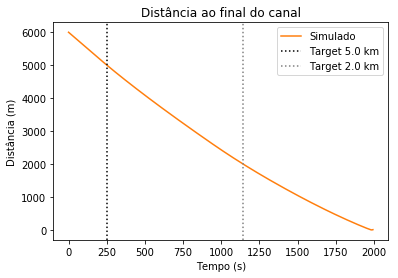

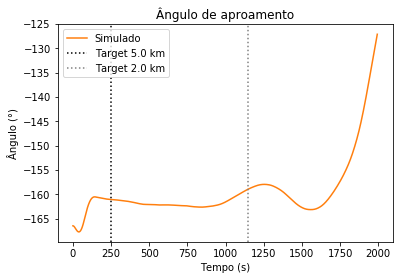

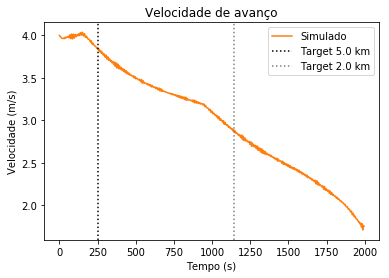

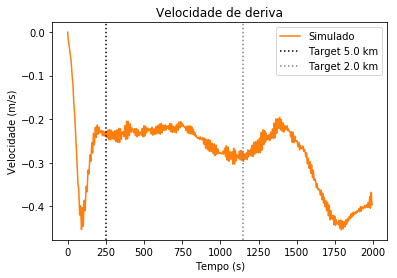

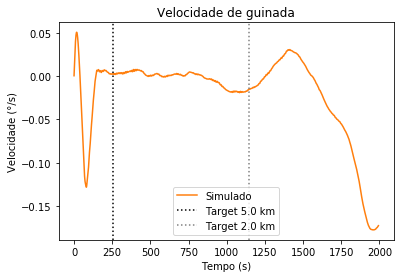

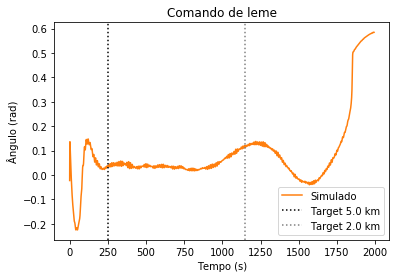

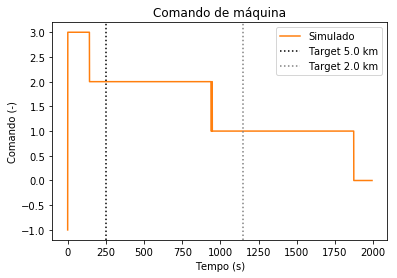

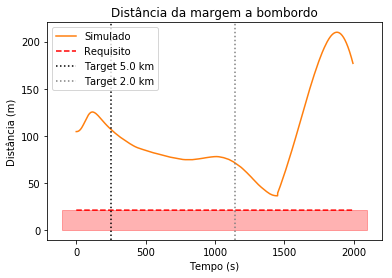

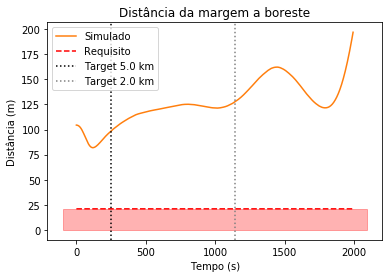

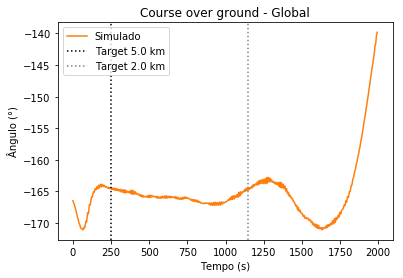

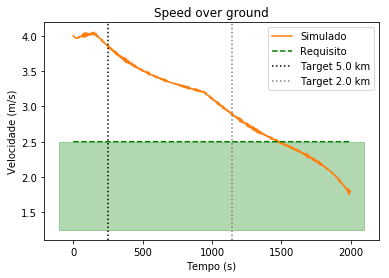

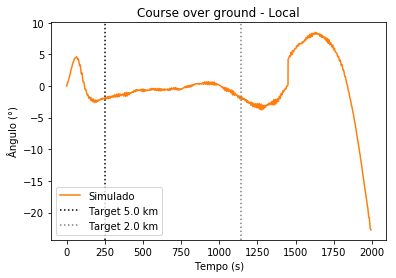

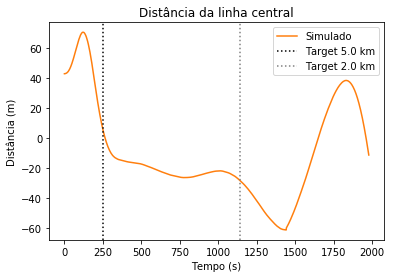

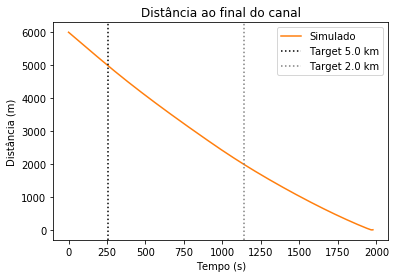

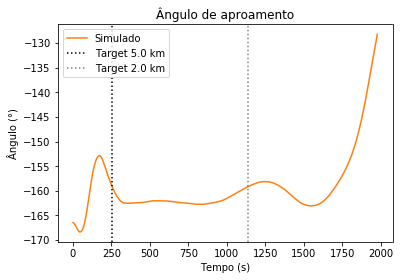

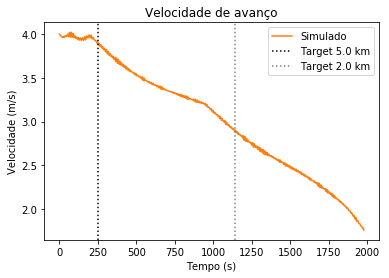

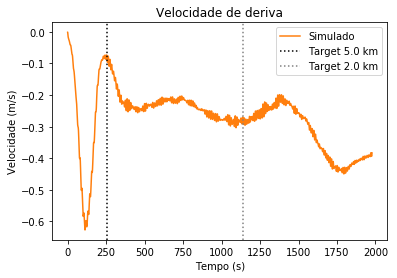

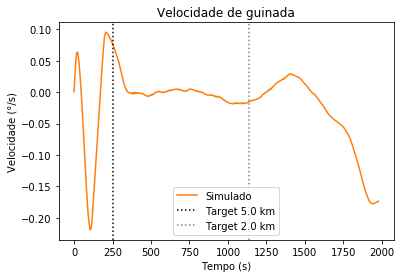

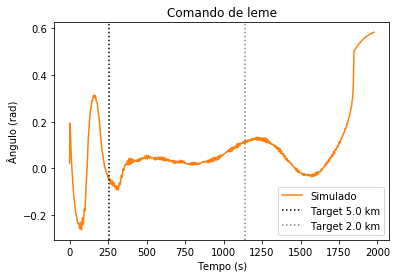

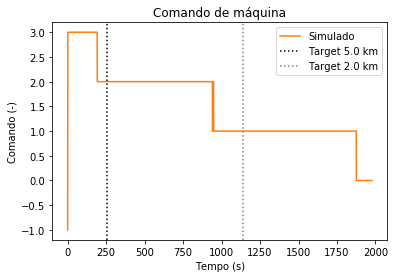

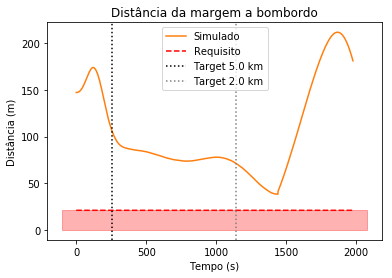

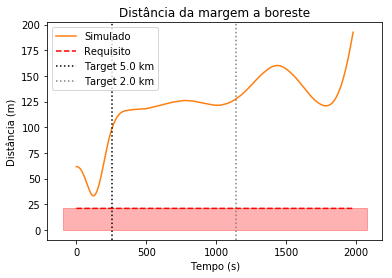

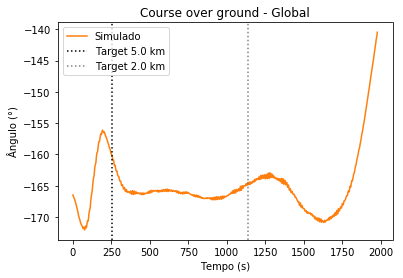

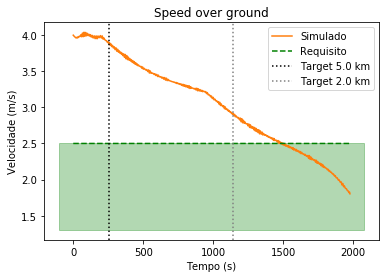

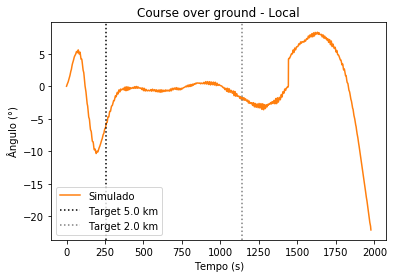

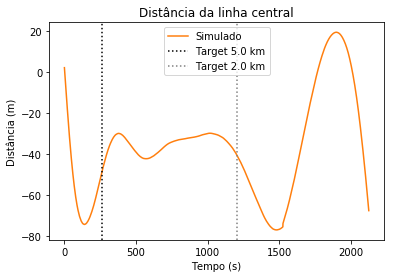

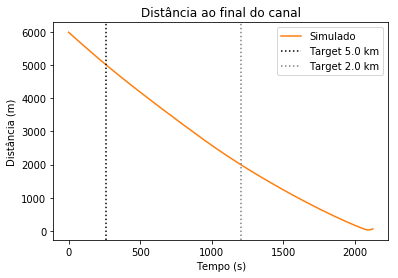

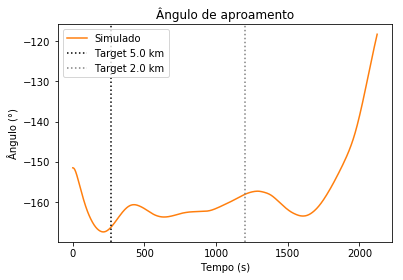

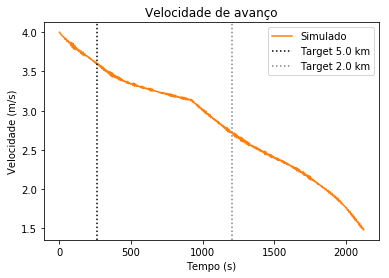

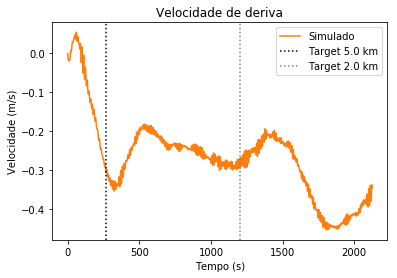

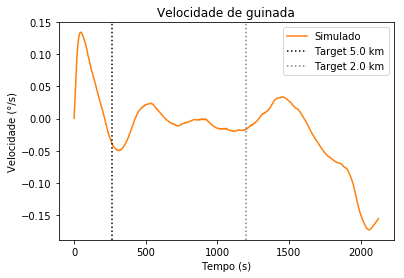

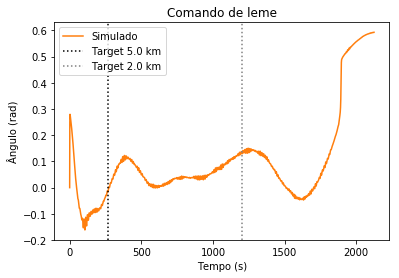

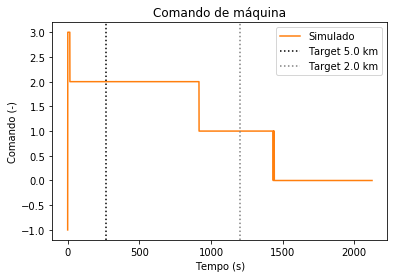

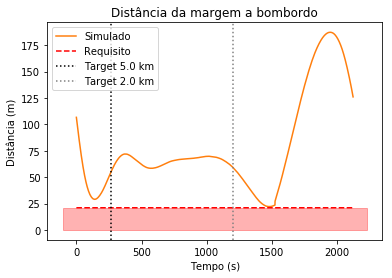

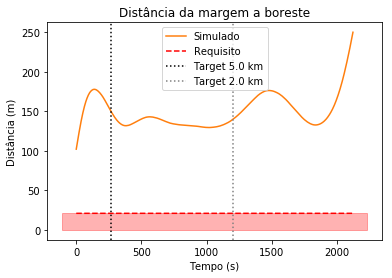

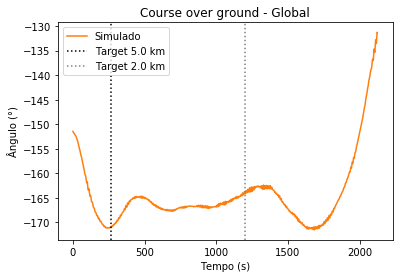

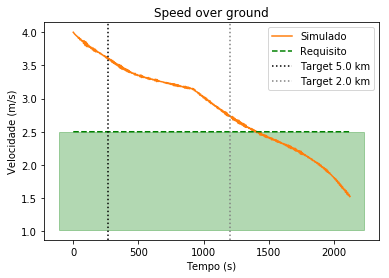

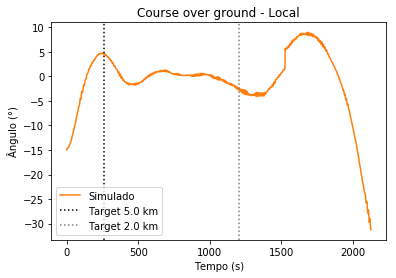

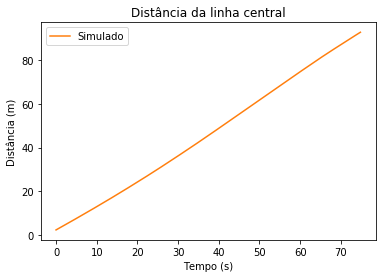

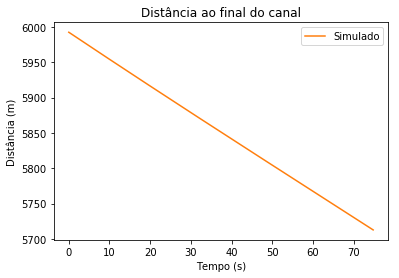

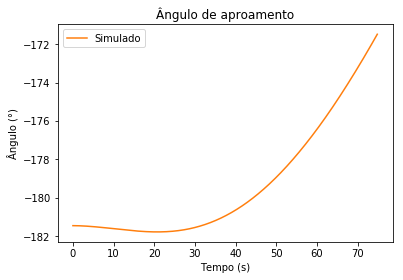

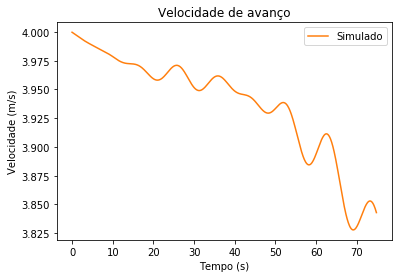

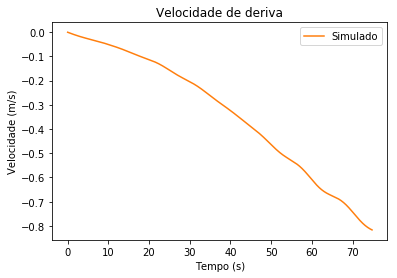

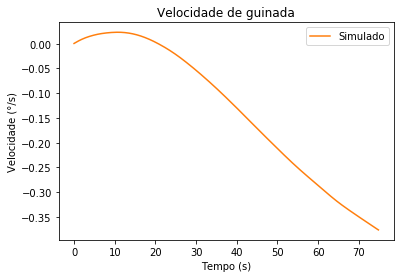

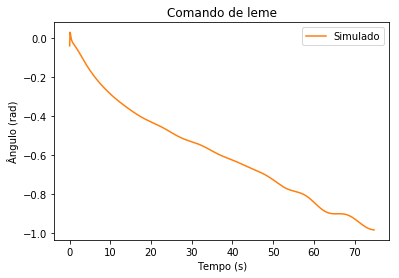

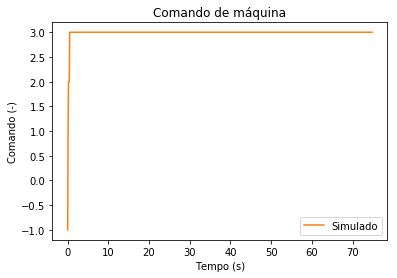

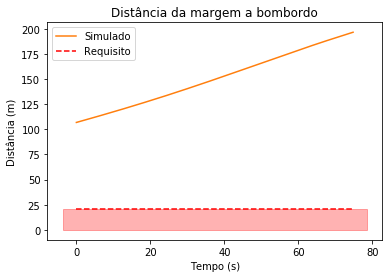

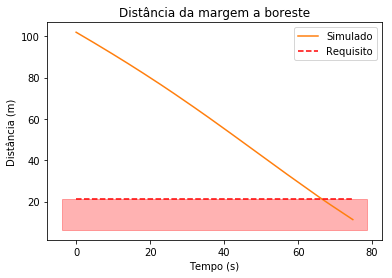

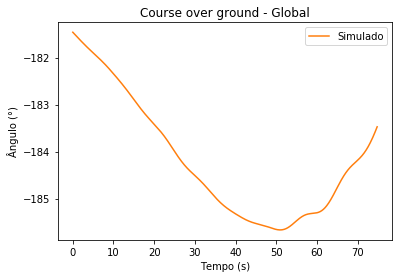

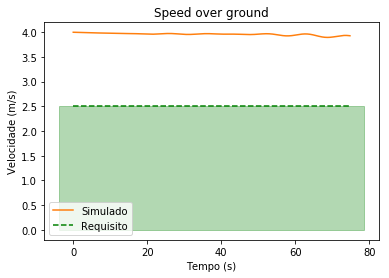

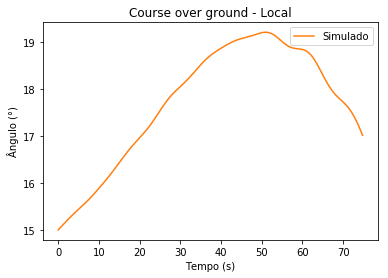

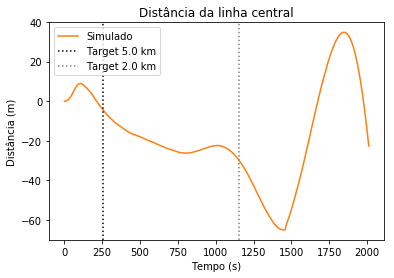

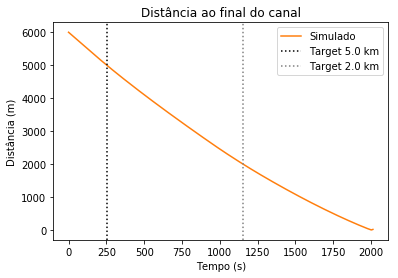

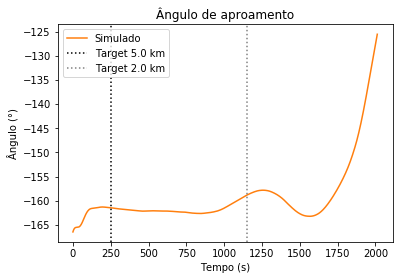

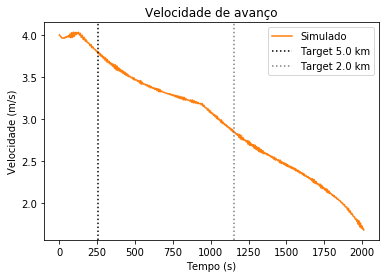

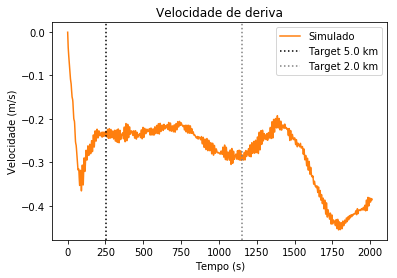

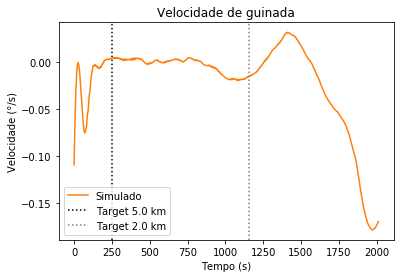

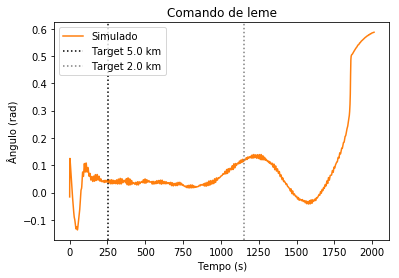

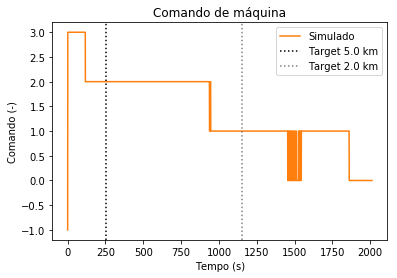

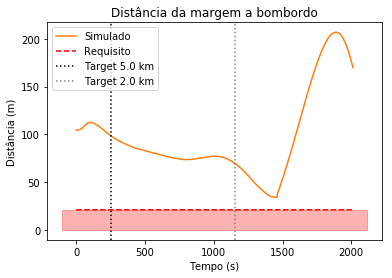

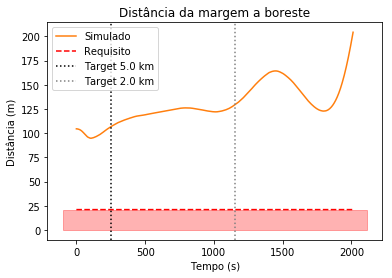

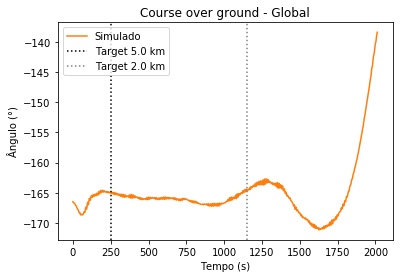

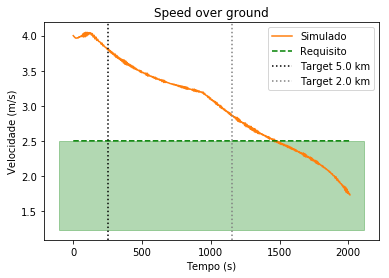

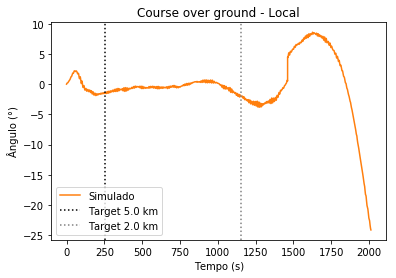

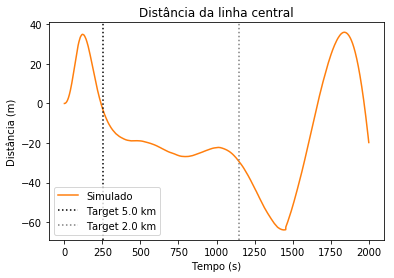

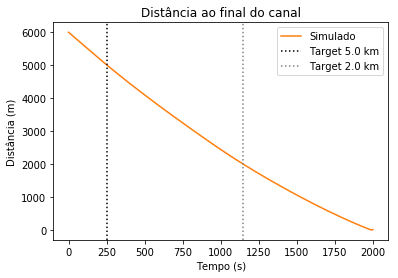

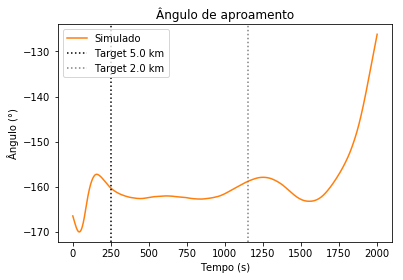

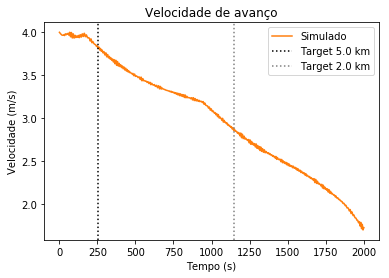

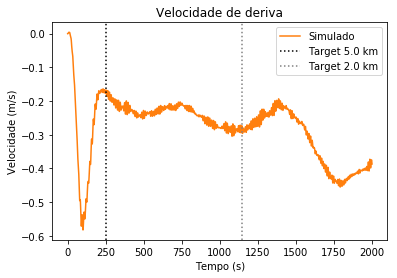

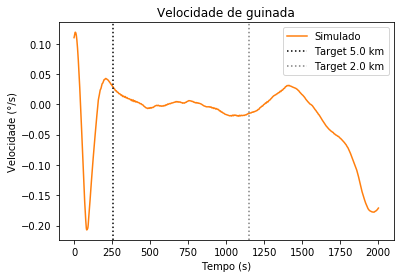

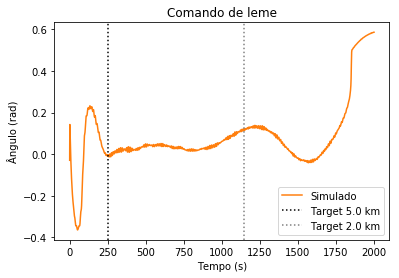

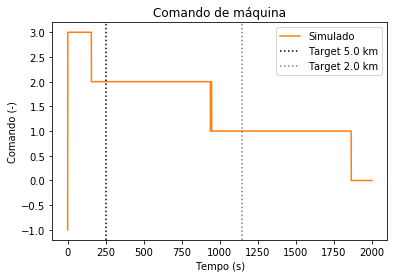

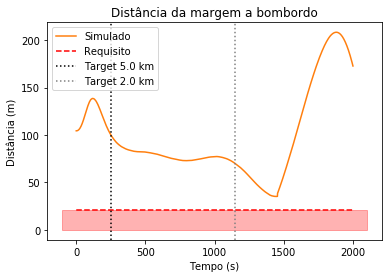

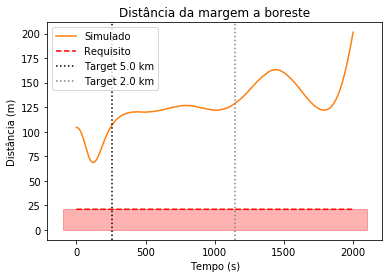

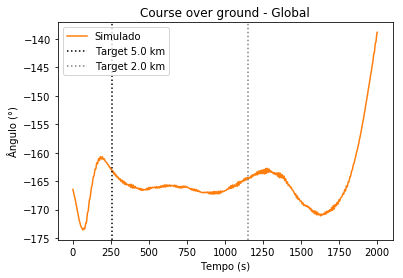

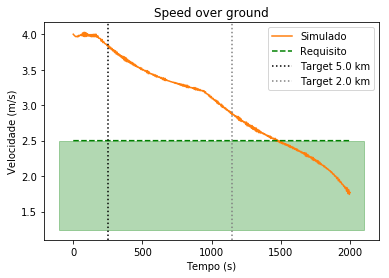

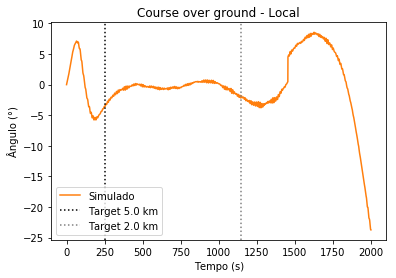

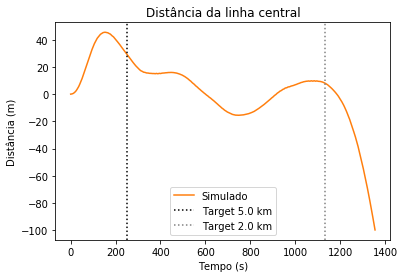

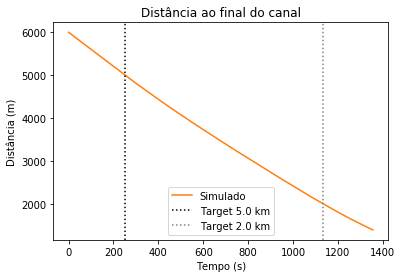

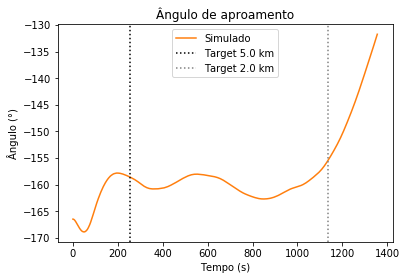

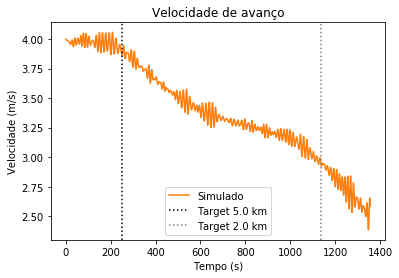

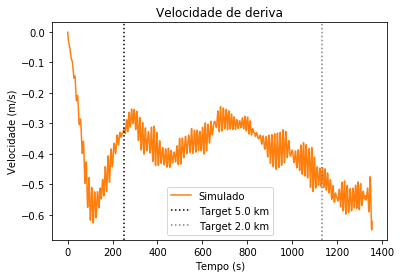

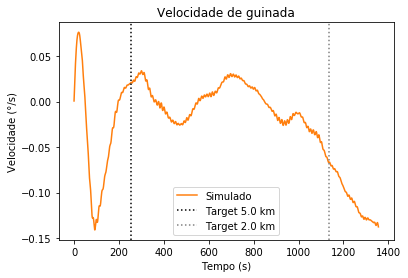

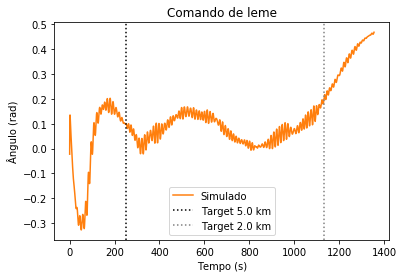

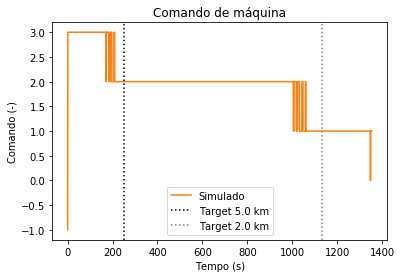

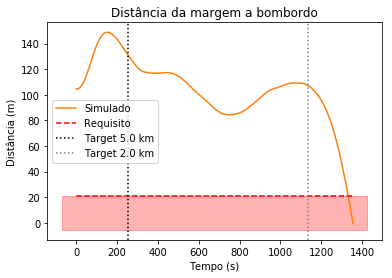

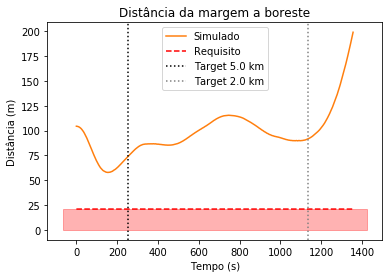

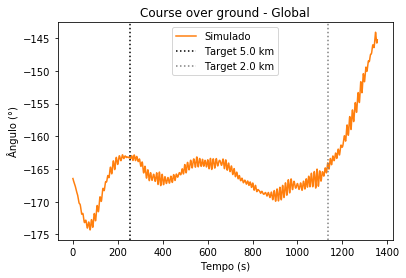

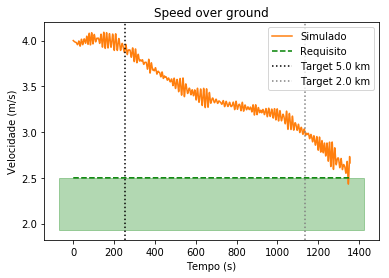

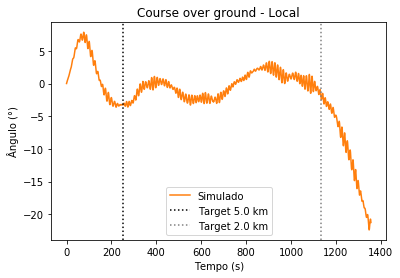

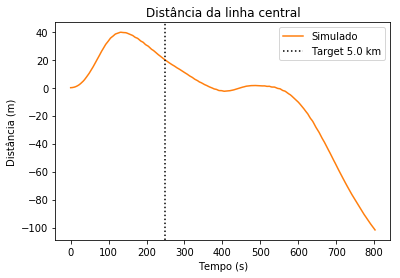

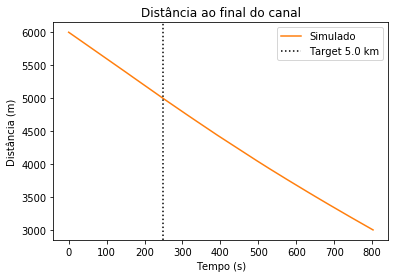

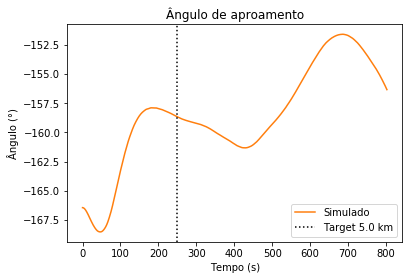

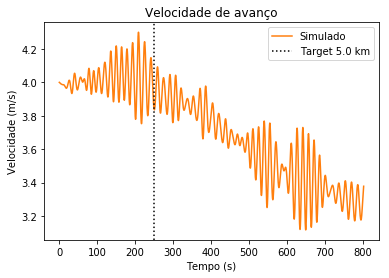

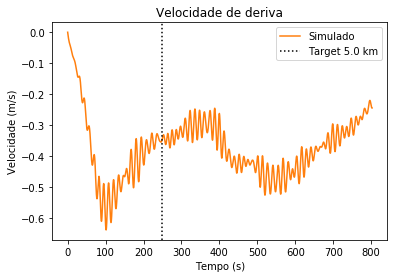

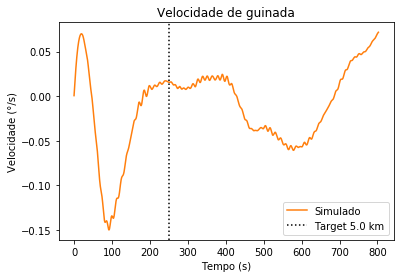

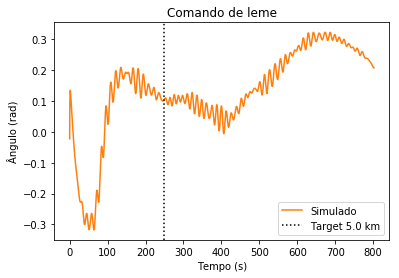

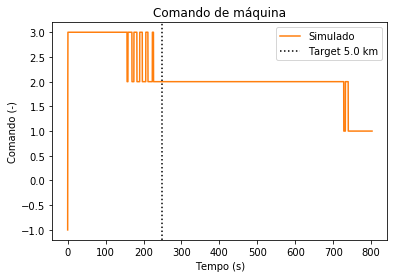

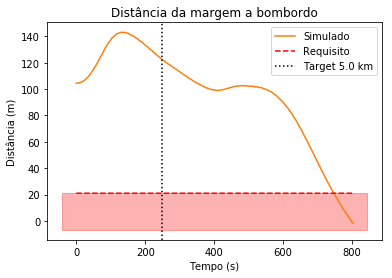

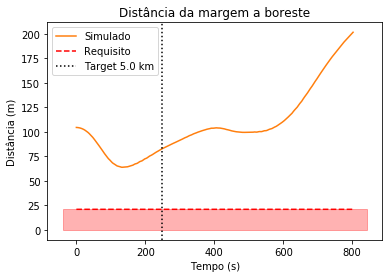

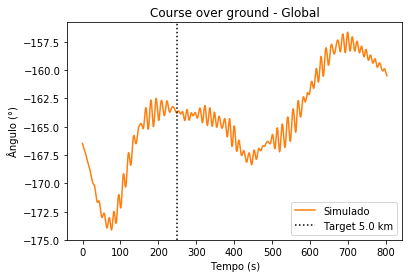

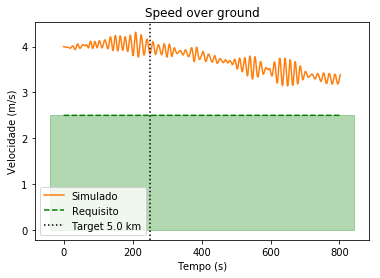

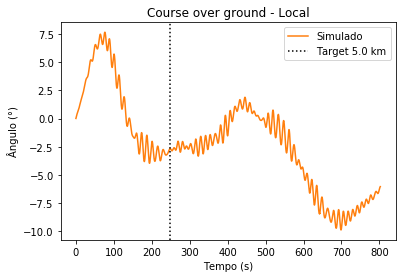

In [5]:
model = 'model_2018-10-17_14-14'
req_min = 21
req_vel = 2.5
ref_target = [5000, 2000]
ref_colors = ['black', 'gray']

def plot_case(df_simul, plot_column, plot_title, y_label, save_folder):
    time_target = []
    df_simul['new_time'] = np.divide(list(range(0, df_simul.shape[0])),10)
    fig = df_simul.plot(x='new_time', y=plot_column, label='Simulado', title=plot_title, color='C1')
    for reference in ref_target:
        if df_simul[df_simul['distance_target'] < reference].shape[0] != 0:
            time_target.append(df_simul[df_simul['distance_target'] < reference]['new_time'].iloc[0])
    if plot_column == 'distance_port' or plot_column == 'distance_starboard':
        df_simul['margin'] = req_min
        df_simul.plot(x='new_time', y='margin', ax=fig, style='r--', label='Requisito') 
        min_val = min(df_simul[plot_column])-5 if min(df_simul[plot_column]) < req_min else 0
        pl.fill_between(fig.get_xlim(), min_val, req_min, color='red', alpha=0.3)
    if plot_column == 'sog':
        df_simul['max_vel'] = req_vel
        df_simul.plot(x='new_time', y='max_vel', ax=fig, style='g--', label='Requisito') 
        min_val = min(df_simul[plot_column])-.5 if min(df_simul[plot_column]) < req_vel else 0
        pl.fill_between(fig.get_xlim(), min_val, req_vel, color='green', alpha=0.3)
    for i, time in enumerate(time_target):
        plt.axvline(x=time, color=ref_colors[i], linestyle=':', label='Target ' + str(ref_target[i]/1000) + ' km')
        plt.legend()
    fig.set_ylabel(y_label)
    fig.set_xlabel('Tempo (s)')
    fig.get_figure().savefig(save_folder + '\\' + plot_column)
    

simul_path = 'C:\\Users\\AlphaCrucis_Control1\\Desktop\\monografia_alex_lucas\\Resultados\\' + model + '\\'
dict_cases = {
    'SC1': ['1_Port', '2_Mid', '3_Star'],
    'SC2': ['4_Port', '6_Star'],
    'SC3': ['7_Port', '9_Star'],
    'SC4': ['2_Forte', '3_Extremo']
}
for section in ['SC1', 'SC2', 'SC3', 'SC4']:
    print(section)
    simul_path_sc = simul_path + section
    if os.path.exists(simul_path_sc):
        for case in dict_cases[section]:
            simul_path_sc_case = simul_path_sc + '\\' + case
            all_files = os.listdir(simul_path_sc_case)
            for file in all_files:
                if file[-4:] == '.txt':
                    simul_path_sc_case_file = simul_path_sc_case + '\\' + file
                    df_simul = pd.read_csv(simul_path_sc_case_file, sep=" ")
                    df_simul[["distance_port", "distance_starboard"]] = df_simul.apply(lambda row: calc_dist_lateral(row), axis=1)
                    plot_case(df_simul, 'distance_midline', 'Distância da linha central', 'Distância (m)', simul_path_sc_case)
                    plot_case(df_simul, 'distance_target', 'Distância ao final do canal', 'Distância (m)', simul_path_sc_case)
                    plot_case(df_simul, 'zz', 'Ângulo de aproamento', 'Ângulo (°)', simul_path_sc_case)
                    plot_case(df_simul, 'vx', 'Velocidade de avanço', 'Velocidade (m/s)', simul_path_sc_case)
                    plot_case(df_simul, 'vy', 'Velocidade de deriva', 'Velocidade (m/s)', simul_path_sc_case)
                    plot_case(df_simul, 'vzz', 'Velocidade de guinada', 'Velocidade (°/s)', simul_path_sc_case)
                    plot_case(df_simul, 'rudder_demanded', 'Comando de leme', 'Ângulo (rad)', simul_path_sc_case)
                    plot_case(df_simul, 'propeller_demanded', 'Comando de máquina', 'Comando (-)', simul_path_sc_case)
                    plot_case(df_simul, 'distance_port', 'Distância da margem a bombordo', 'Distância (m)', simul_path_sc_case)
                    plot_case(df_simul, 'distance_starboard', 'Distância da margem a boreste', 'Distância (m)', simul_path_sc_case)
                    plot_case(df_simul, 'cog', 'Course over ground - Global', 'Ângulo (°)', simul_path_sc_case)
                    plot_case(df_simul, 'sog', 'Speed over ground', 'Velocidade (m/s)', simul_path_sc_case)
                    plot_case(df_simul, 'local_cog', 'Course over ground - Local', 'Ângulo (°)', simul_path_sc_case)

# Conversão do svg e corte da imagem

In [47]:
dict_cases = {
    'SC1': ['1_Port', '2_Mid', '3_Star'],
    'SC2': ['4_Port', '6_Star'],
    'SC3': ['7_Port', '9_Star'],
    'SC4': ['2_Forte', '3_Extremo']
}
for model in ['model_2018-10-17_14-14', 'model_2018-10-18_0-58', 'model_2018-10-18_11-39', 'model_2018-10-19_23-17']:
    simul_path = 'C:/Users/AlphaCrucis_Control1/Desktop/monografia_alex_lucas/Resultados/' + model + '/'
    for section in ['SC1', 'SC2', 'SC3', 'SC4']:
        print(section)
        simul_path_sc = simul_path + section
        if os.path.exists(simul_path_sc):
            for case in dict_cases[section]:
                simul_path_sc_case = simul_path_sc + '/' + case
                all_files = os.listdir(simul_path_sc_case)
                for file in all_files:
                    if file[-4:] == '.svg':
                        simul_path_sc_case_file = simul_path_sc_case + '/' + file
                        subprocess.run(['C:/Program Files/Inkscape/Inkscape.exe',
                                        '-z', 
                                        '-e', simul_path_sc_case + '/simulation_plot.png', 
                                        '-f', simul_path_sc_case_file])
                        img = Image.open(simul_path_sc_case + '/simulation_plot.png')
                        w, h = img.size
                        img.crop((500, 75, w-100, h-500)).save(simul_path_sc_case + '/simulation_plot.png')

SC1
SC2
SC3
SC4
SC1
SC2
SC3
SC4
SC1
SC2
SC3
SC4
SC1
SC2
SC3
SC4


# Código para gerar Latex

In [5]:
dict_full = {
    'Condição inicial 1': 'SC1/1_Port/',
    'Condição inicial 2': 'SC1/2_Mid/',
    'Condição inicial 3': 'SC1/3_Star/',
    'Condição inicial 4': 'SC2/4_Port/',
    'Condição inicial 6': 'SC2/6_Star/',
    'Condição inicial 7': 'SC3/7_Port/',
    'Condição inicial 9': 'SC3/9_Star/'
}
for model in ['Rede1', 'Rede2', 'Rede3', 'Rede4']:
    print('\\section{Rede ' + model[-1:] + '}')
    print('\\label{AP_SC:Rede_' + model[-1:] + '}')
    for init_cond in ['Condição inicial 1', 'Condição inicial 2', 'Condição inicial 3', 'Condição inicial 4', 'Condição inicial 6', 'Condição inicial 7', 'Condição inicial 9']:
        print('\\subsection{' + init_cond + '}')
        print('\\label{AP_SSC:Rede_' + model[-1:] + '_CondicaoInicial_' + init_cond[-1:] + '}')
        print('\\begin{figure}[H]')
        print('\t\\centering')
        print('\t\\caption{Trajetória realizada pela rede ' + model[-1:] + ' na condição inicial ' + init_cond[-1:] + '}')
        print('\t\\includegraphics[width=15.9cm, trim={0.2cm 2.5cm 0 2.5cm}, clip]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'plot_simulation.png}')
        print('\t\\label{fig:Trajetoria_Rede_' + model[-1:] + '_CondicaoInicial_' + init_cond[-1:] + '}')
        print('\t\\source{Autores}')
        print('\\end{figure}')
        print('\\begin{figure}[H]')
        print('\t\\centering')
        print('\t\\caption{Evolução dos estados na simulação da rede ' + model[-1:] + ' na condição inicial ' + init_cond[-1:] + '}')
        print('\t\\centerline{')
        print('\t\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'distance_port.png}')
        print('\t\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'distance_starboard.png}')
        print('\t\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'sog.png}')
        print('\t}')
        print('\t\\centerline{')
        #print('\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'cog.png}')
        print('\t\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'distance_midline.png}')
        print('\t\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'distance_target.png}')
        print('\t\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'propeller_demanded.png}')
        print('\t}')
        print('\t\\centerline{')
        print('\t\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'rudder_demanded.png}')
        print('\t\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'vzz.png}')
        print('\t\t\\includegraphics[width=5cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'zz.png}')
        print('\t}')
        print('\t\\label{fig:Estados_Rede_' + model[-1:] + '_CondicaoInicial_' + init_cond[-1:] + '}')
        print('\t\\source{Autores}')
        print('\\end{figure}')
        print('\n')

\section{Rede 1}
\label{AP_SC:Rede_1}
\subsection{Condição inicial 1}
\label{AP_SSC:Rede_1_CondicaoInicial_1}
\begin{figure}[H]
	\centering
	\caption{Trajetória realizada pela rede 1 na condição inicial 1}
	\includegraphics[width=15.9cm, trim={0.2cm 2.5cm 0 2.5cm}, clip]{Fig/Resultados/Rede1/SC1/1_Port/plot_simulation.png}
	\label{fig:Trajetoria_Rede_1_CondicaoInicial_1}
	\source{Autores}
\end{figure}
\begin{figure}[H]
	\centering
	\caption{Evolução dos estados na simulação da rede 1 na condição inicial 1}
	\centerline{
		\includegraphics[width=5cm]{Fig/Resultados/Rede1/SC1/1_Port/distance_port.png}
		\includegraphics[width=5cm]{Fig/Resultados/Rede1/SC1/1_Port/distance_starboard.png}
		\includegraphics[width=5cm]{Fig/Resultados/Rede1/SC1/1_Port/sog.png}
	}
	\centerline{
		\includegraphics[width=5cm]{Fig/Resultados/Rede1/SC1/1_Port/distance_midline.png}
		\includegraphics[width=5cm]{Fig/Resultados/Rede1/SC1/1_Port/distance_target.png}
		\includegraphics[width=5cm]{Fig/Resultados/Rede1/S

# Código gerar Latex simplificado

In [95]:
dict_full = {
    'Condição inicial 1': 'SC1/1_Port/',
    'Condição inicial 2': 'SC1/2_Mid/',
    'Condição inicial 3': 'SC1/3_Star/',
    'Condição inicial 4': 'SC2/4_Port/',
    'Condição inicial 6': 'SC2/6_Star/',
    'Condição inicial 7': 'SC3/7_Port/',
    'Condição inicial 9': 'SC3/9_Star/'
}
for model in ['Rede1', 'Rede2', 'Rede3', 'Rede4']:
    print('\\section{Rede ' + model[-1:] + '}')
    print('\\label{AP_SC:Rede_' + model[-1:] + '}')
    for init_cond in ['Condição inicial 1', 'Condição inicial 2', 'Condição inicial 3', 'Condição inicial 4', 'Condição inicial 6', 'Condição inicial 7', 'Condição inicial 9']:
        print('\\label{AP_SSC:Rede_' + model[-1:] + '_CondicaoInicial_' + init_cond[-1:] + '}')
        print('\\begin{figure}[H]')
        print('\t\\centering')
        print('\t\\caption{Manobra realizada pela rede ' + model[-1:] + ' na condição inicial ' + init_cond[-1:] + '}')
        print('\t\\includegraphics[width=7.3cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'simulation_plot.png}')
        print('\t\\includegraphics[width=7.3cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'sog.png}')
        print('\t\\includegraphics[width=7.3cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'distance_port.png}')
        print('\t\\includegraphics[width=7.3cm]{Fig/Resultados/Rede' + model[-1:] + '/' + dict_full[init_cond] + 'distance_starboard.png}')
        print('\t\\label{fig:Manobra_Rede_' + model[-1:] + '_CondicaoInicial_' + init_cond[-1:] + '}')
        print('\t\\source{Autores}')
        print('\\end{figure}')
        print('\n')

\section{Rede 1}
\label{AP_SC:Rede_1}
\label{AP_SSC:Rede_1_CondicaoInicial_1}
\begin{figure}[H]
	\centering
	\caption{Manobra realizada pela rede 1 na condição inicial 1}
	\includegraphics[width=7.3cm]{Fig/Resultados/Rede1/SC1/1_Port/simulation_plot.png}
	\includegraphics[width=7.3cm]{Fig/Resultados/Rede1/SC1/1_Port/sog.png}
	\includegraphics[width=7.3cm]{Fig/Resultados/Rede1/SC1/1_Port/distance_port.png}
	\includegraphics[width=7.3cm]{Fig/Resultados/Rede1/SC1/1_Port/distance_starboard.png}
	\label{fig:Manobra_Rede_1_CondicaoInicial_1}
	\source{Autores}
\end{figure}


\label{AP_SSC:Rede_1_CondicaoInicial_2}
\begin{figure}[H]
	\centering
	\caption{Manobra realizada pela rede 1 na condição inicial 2}
	\includegraphics[width=7.3cm]{Fig/Resultados/Rede1/SC1/2_Mid/simulation_plot.png}
	\includegraphics[width=7.3cm]{Fig/Resultados/Rede1/SC1/2_Mid/sog.png}
	\includegraphics[width=7.3cm]{Fig/Resultados/Rede1/SC1/2_Mid/distance_port.png}
	\includegraphics[width=7.3cm]{Fig/Resultados/Rede1/SC1/2